In [22]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [23]:
csv_file = tf.keras.utils.get_file(fname=None, origin=f'file:///C:/python/chronicare/dataset/diabetes.csv', extract=True)

In [24]:
df = pd.read_csv(csv_file)

age_min = df['age'].min()
age_max = df['age'].max()

# Lakukan Min-Max Scaling pada fitur "umur"
df['age'] = (df['age'] - age_min) / (age_max - age_min)

In [25]:
df["gender"] = pd.Categorical(df["gender"])
df["gender"] = df.gender.cat.codes

# df["polyuria"] = pd.Categorical(df["polyuria"])
# df["polyuria"] = df.polyuria.cat.codes

# df["polydipsia"] = pd.Categorical(df["polydipsia"])
# df["polydipsia"] = df.polydipsia.cat.codes

# df["sudden_weight_loss"] = pd.Categorical(df["sudden_weight_loss"])
# df["sudden_weight_loss"] = df.sudden_weight_loss.cat.codes

# df["polyphagia"] = pd.Categorical(df["polyphagia"])
# df["polyphagia"] = df.polyphagia.cat.codes

# df["delayed_healing"] = pd.Categorical(df["delayed_healing"])
# df["delayed_healing"] = df.delayed_healing.cat.codes

# df["obesity"] = pd.Categorical(df["obesity"])
# df["obesity"] = df.obesity.cat.codes

target = df.pop("class")

In [26]:
df

,age,gender,polyuria,polydipsia,sudden_weight_loss,polyphagia,delayed_healing,obesity
0,0.324324,1,0,1,0,0,1,1
1,0.567568,1,0,0,0,0,0,0
2,0.337838,1,1,0,0,1,1,0
3,0.391892,1,0,0,1,1,1,0
4,0.594595,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
515,0.310811,0,1,1,1,1,1,0
516,0.432432,0,1,1,1,1,1,0
517,0.567568,0,1,1,1,1,0,1
518,0.216216,0,0,0,0,0,1,0


In [27]:
target

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: class, Length: 520, dtype: int64

In [28]:
#dataset = tf.data.Dataset.from_tensor_slices((df.values, target.values))

X = df.values
y = target.values

# Pemisahan data dengan 80% data pelatihan dan 20% data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Konversi data menjadi TensorFlow Dataset 
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(len(X_train)).batch(1)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(1)

In [29]:
n_features = df.shape[1]

In [43]:
#train_dataset = dataset.shuffle(len(df)).batch(1)
model = tf.keras.Sequential([
    # tf.keras.layers.Dense(10, activation='relu', input_shape=(n_features,)),
    # tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu', input_shape=(n_features,)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_dataset, epochs=50)

Epoch 1/50
416/416 [==============================] - 2s 4ms/step - loss: 0.3280 - accuracy: 0.8678
Epoch 2/50
416/416 [==============================] - 2s 4ms/step - loss: 0.2530 - accuracy: 0.9038
Epoch 3/50
416/416 [==============================] - 2s 4ms/step - loss: 0.2358 - accuracy: 0.9135
Epoch 4/50
416/416 [==============================] - 2s 4ms/step - loss: 0.2021 - accuracy: 0.9207
Epoch 5/50
416/416 [==============================] - 2s 4ms/step - loss: 0.2066 - accuracy: 0.9231
Epoch 6/50
416/416 [==============================] - 2s 4ms/step - loss: 0.1830 - accuracy: 0.9255
Epoch 7/50
416/416 [==============================] - 2s 4ms/step - loss: 0.1731 - accuracy: 0.9351
Epoch 8/50
416/416 [==============================] - 2s 4ms/step - loss: 0.1644 - accuracy: 0.9351
Epoch 9/50
416/416 [==============================] - 2s 4ms/step - loss: 0.1595 - accuracy: 0.9351
Epoch 10/50
416/416 [==============================] - 2s 4ms/step - loss: 0.1468 - accuracy: 0.9399

In [44]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                576       
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 128)               8320      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 256)               33024     
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_18 (Dense)            (None, 1)                

In [45]:
print(age_min)
print(age_max)

16
90


In [46]:
new_data_dict = {
    'age':                  [40],
    'gender':               [1],
    'polyuria':             [0],
    'polydipsia':           [1],
    'sudden_weight_loss':   [1],
    'polyphagia':           [0],
    'delayed_healing':      [0],
    'obesity':              [0]
}


# Ubah dictionary menjadi DataFrame
new_data = pd.DataFrame(new_data_dict)
new_data['age'] = (new_data['age'] - age_min) / (age_max - age_min)

# Lakukan prediksi dengan model yang sudah dilatih:
predictions = model.predict(new_data)

# Nilai predictions berisi probabilitas untuk setiap sampel menjadi kelas positif (1) atau kelas negatif (0).

# Jika Anda hanya tertarik pada prediksi biner (1 atau 0) berdasarkan probabilitas, Anda dapat mengambil ambang batas tertentu, misalnya 0.5, untuk mengklasifikasikan data baru.
binary_predictions = (predictions > 0.5).astype(int)

print(predictions)
print(binary_predictions)

1/1 [==============================] - 0s 62ms/step
[[6.7385525e-10]]
[[0]]


In [47]:
X_test[20:25]

array([[0.22972973, 1.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.25675676, 0.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.        ],
       [0.39189189, 0.        , 1.        , 1.        , 0.        ,
        1.        , 1.        , 0.        ],
       [0.59459459, 1.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.37837838, 1.        , 1.        , 0.        , 1.        ,
        0.        , 1.        , 1.        ]])

In [48]:
y_test[20:25]

array([1, 1, 1, 1, 0], dtype=int64)

In [49]:
dataNew = [[
    0.2972973 , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.                                                                             
]]
dataNew = X_test

dataNew = np.array(dataNew)

predictions = model.predict(dataNew)
print(predictions)
binary_predictions = (predictions > 0.5).astype(int)
print(binary_predictions)

4/4 [==============================] - 0s 2ms/step
[[2.68654991e-02]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.94209170e-01]
 [1.00000000e+00]
 [7.31812716e-01]
 [3.31371963e-01]
 [9.98978138e-01]
 [1.87776663e-04]
 [2.01574039e-06]
 [1.00000000e+00]
 [1.75665682e-05]
 [2.12086979e-02]
 [1.00000000e+00]
 [9.99999881e-01]
 [1.17407419e-01]
 [1.00000000e+00]
 [1.19364240e-05]
 [1.00000000e+00]
 [9.99835134e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99999762e-01]
 [1.03567072e-06]
 [1.81067397e-10]
 [1.00000000e+00]
 [1.00000000e+00]
 [2.33619120e-02]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [2.01574039e-06]
 [9.99982476e-01]
 [2.80059212e-05]
 [3.63933407e-02]
 [1.00000000e+00]
 [6.31879175e-06]
 [1.05398904e-07]
 [6.73856526e-10]
 [1.00000000e+00]
 [6.73856526e-10]
 [9.96594489e-01]
 [1.00000000e+00]
 [1.87776663e-04]
 [1.00000000e+00]
 [1.12559998e-16]
 [1.00000000e+00]
 [9.99961019e-01]
 [1.00000000e+00]
 [4.37121089e-05]
 [1.12559998e-16]
 [1.00000000e

Akurasi Model: 0.9711538461538461
Presisi Model: 0.9857142857142858
Recall Model: 0.971830985915493
F1-Score Model: 0.9787234042553192
AUC-ROC Score: 0.990183525394793


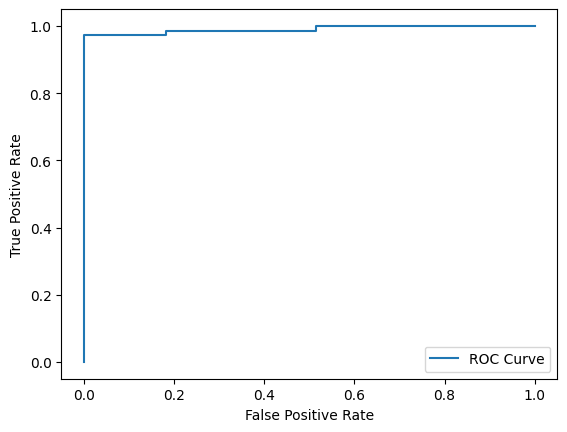

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Misalkan Anda telah melakukan prediksi pada data pengujian dan hasilnya disimpan dalam variabel binary_predictions

# Evaluasi dengan metrik akurasi
accuracy = accuracy_score(y_test, binary_predictions)
print(f'Akurasi Model: {accuracy}')

# Evaluasi dengan metrik presisi (precision)
precision = precision_score(y_test, binary_predictions)
print(f'Presisi Model: {precision}')

# Evaluasi dengan metrik recall
recall = recall_score(y_test, binary_predictions)
print(f'Recall Model: {recall}')

# Evaluasi dengan metrik F1-score
f1 = f1_score(y_test, binary_predictions)
print(f'F1-Score Model: {f1}')

# Evaluasi dengan metrik AUC-ROC
roc_auc = roc_auc_score(y_test, predictions)
print(f'AUC-ROC Score: {roc_auc}')

# Plot kurva ROC (opsional)
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [51]:
# Konversi data pengujian menjadi TensorFlow Dataset
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(1)
# Evaluasi model pada data pengujian
loss, accuracy = model.evaluate(test_dataset)
print(f'Loss: {loss}, Accuracy: {accuracy}')


104/104 [==============================] - 0s 3ms/step - loss: 0.1681 - accuracy: 0.9712
Loss: 0.16812825202941895, Accuracy: 0.9711538553237915


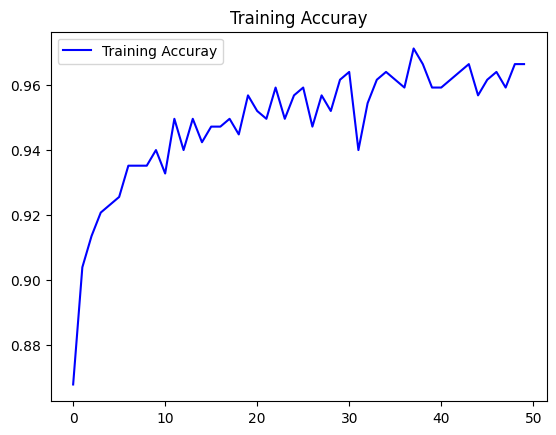

<Figure size 640x480 with 0 Axes>

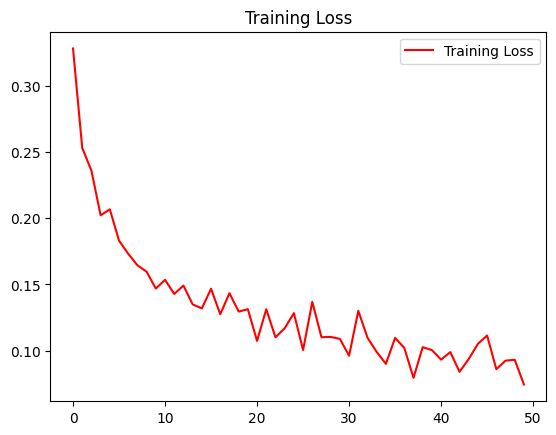

<Figure size 640x480 with 0 Axes>

In [52]:
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(loss))

import matplotlib.pyplot as plt

plt.plot(epochs, accuracy, 'b', label='Training Accuray')
plt.title('Training Accuray')
plt.legend(loc=0)
plt.figure()
plt.show()

print("")

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Training Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [53]:
model.save('diabetes.h5')

In [54]:
import json
    
# Data to be written
dictionary ={
    "age_min" : int(age_min),
    "age_max" : int(age_max),
}
    
with open("diabetes.json", "w") as outfile:
    json.dump(dictionary, outfile)